In [ ]:
# Functions

import networkx as nx 
import numpy as np

def all_pairs(nodes):
    for i, u in enumerate(nodes):
        for j, v in enumerate(nodes):
            if i>j:
                yield u, v

def random_pairs(nodes, p):
    for edge in all_pairs(nodes):
        if flip(p):
            yield edge
            
def flip(p):
    return np.random.random() < p

def make_random_graph(n, p):
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(random_pairs(nodes, p))
    return G

def average(lst):
    return sum(lst) / len(lst)
    

In [ ]:
# Question 1

import networkx
import numpy
import matplotlib

n = 1000
m = 3000
p = 0.0034

friendships = []

nodes = numpy.arange(n)

for t in range(0,10):
    
    G = networkx.Graph()
    G.add_nodes_from(nodes)
    
    for i in range(0,n):
        for j in range(i+1,n):
            s = numpy.random.choice([0,1], p=[1-0.0034, 0.0034])
            
            if s == 1:
               G.add_edges_from([(nodes[i],nodes[j])])
       
    friendships.append(G.number_of_edges())
    
    G.clear()

m_simulation = numpy.mean(friendships)
print(m_simulation)


1670.8


153.2


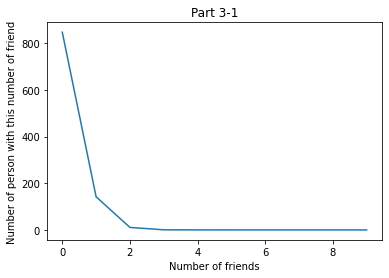

In [ ]:
# Question 2

import matplotlib.pyplot as plt
import networkx as nx 

n = 1000
p = 0.00016
L = []
n_plot = 10
friends_n = list(range(0,n_plot))
friendship_data = []
social_person_n = []
n_loop = 10
  
for i in range (0,n_loop):
  haveFriend = [0]*n_plot
  G = make_random_graph(n, p)
  L.append(nx.Graph.number_of_edges(G)*2/n)
  social_person_sum = 0

  for j in range (0,n):
    for k in range(0,len(friends_n)):
      if(G.degree(j)==k):
        haveFriend[k]+=1
    if(G.degree(j)>L[i]):
      social_person_sum += 1
  social_person_n.append(social_person_sum)
  friendship_data.append(haveFriend)
print(average(social_person_n))

ploting_data= [];
for i in range (0,n_plot):
  temp = []
  for j in range (0,n_loop):
    temp.append(friendship_data[j][i])
  ploting_data.append(average(temp))

plt.plot(friends_n, ploting_data)
plt.xlabel('Number of friends')
plt.ylabel('Number of person with this number of friend')
plt.title('Part 3-1')
plt.show()

In [ ]:
# Question 3
# run time = 1m 38s

import networkx as nx 

n = 3000
p = 0.01
loop_n = 5
transitives = []
competitions = []

for i in range (0,loop_n):
  transitive = 0
  competition = 0
  processed = []
  random_graph = make_random_graph(n, p)

  for j in range (0,n):
    transitive += nx.triangles(random_graph,j)

  dictionary = dict(nx.shortest_path_length(random_graph))
  for k in range (0,len(dictionary)):
    res = sum(x == 2 for x in dictionary[k].values())
    competition += res/2
    
  transitives.append((transitive/3))
  competitions.append(competition)

print(average(transitives))
print(average(competitions))

4411.6
1149307.2


In [ ]:
# Question 4
# run time = 2m 35s

import networkx as nx 

n = 2000
p = 0.2
loop_n = 3
transitives = []
competitions = []

for i in range (0,loop_n):
  transitive = 0
  competition = 0
  processed = []
  random_graph = make_random_graph(n, p)

  for j in range (0,n):
    transitive += nx.triangles(random_graph,j)

  dictionary = dict(nx.shortest_path_length(random_graph))
  for k in range (0,len(dictionary)):
    res = sum(x == 2 for x in dictionary[k].values())
    competition += res/2
    
  transitives.append((transitive/3))
  competitions.append(competition)

print(average(transitives))
print(average(competitions))

In [ ]:
# Question 5
# if all friendship must be around the base person

import networkx as nx 

n = 1000
p = 0.003
sum_of_friendship = 0

G = make_random_graph(n, p)

for i in range(0,n):
  sum_of_friendship += G.subgraph(G.adj[i]).number_of_edges()

print(sum_of_friendship/n)

0.012


In [ ]:
# Question 5
# if all friendship must not be around the base person

import networkx as nx 

n = 1000
p = 0.003
sum_of_friendship = []

G = make_random_graph(n, p)

for i in range(0,n):
  temp = 0
  for j in range(0,G.degree(i)):
    temp += G.degree(list(G.neighbors(i))[j])/2
    sum_of_friendship.append(temp)

print(average(sum_of_friendship))

4.719387755102041


In [ ]:
# Question 6

import networkx as nx 

n = 1000
p = 0.0033

G = make_random_graph(n, p)

sum = 0
num = 0

dictionary = dict(nx.shortest_path_length(G))
for i in range (0,len(dictionary)):
  for j in range (0,len(list(dictionary[i].values()))):
    sum += list(dictionary[i].values())[j]
  num += len(dictionary[i])

print(sum/num)

5.763380578738277


In [ ]:
# Question 7

import networkx as nx 

n = 50
p = 0.34
loop_n = 100
data = []

for i in range (0,loop_n):
  G = make_random_graph(n, p)
  if(nx.is_connected(G) == False):
      for j in range(0,n):
        if(G.degree(j)==0):
          G.remove_node(j)
  data.append(nx.algorithms.distance_measures.diameter(G))

print(average(data))

2.83


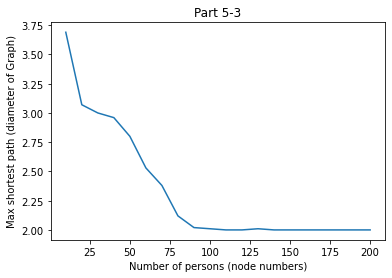

In [ ]:
# Question 8
# run time : 8m 56s

import networkx as nx 
import matplotlib.pyplot as plt

n_s = 10
p = 0.34
loop_n = 100
step = 10
n_cycle = 20

x = []
y = []

for i in range (0,n_cycle):
  x.append(n_s)
  data = []
  for j in range (0,loop_n):
    G = make_random_graph(n_s, p)
    G = G.subgraph(max(nx.connected_components(G), key=len))
    data.append(nx.algorithms.distance_measures.diameter(G))
  y.append(average(data))
  n_s += step

plt.plot(x, y)
plt.xlabel('Number of persons (node numbers)')
plt.ylabel('Max shortest path (diameter of Graph)')
plt.title('Part 5-3')
plt.show()

In [ ]:
# Question 9

import networkx as nx 

n = 100
p = 0.34
loop_n = 100
transitives = []

for i in range (0,loop_n):
  random_graph = make_random_graph(n, p)
  transitive = nx.triangles(random_graph)
  transitives.append((sum(transitive.values())/3))

print(average(transitives))

6406.3


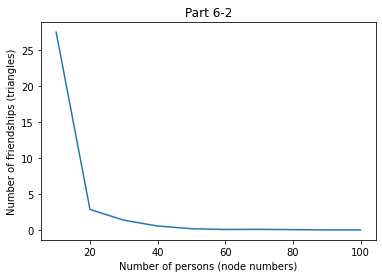

In [ ]:
# Question 10

import networkx as nx 
import matplotlib.pyplot as plt

n_s = 10
loop_n = 100
step = 10
n_cycle = 10

x = []
y = []

for i in range (0,n_cycle):
  x.append(n_s)
  transitives = []
  p = 60/n_s/n_s
  for j in range (0,loop_n):
    random_graph = make_random_graph(n_s, p)
    transitive = nx.triangles(random_graph)
    transitives.append((sum(transitive.values())/3))
  n_s += step
  y.append(average(transitives))

plt.plot(x, y)
plt.xlabel('Number of persons (node numbers)')
plt.ylabel('Number of friendships (triangles)')
plt.title('Part 6-2')
plt.show()

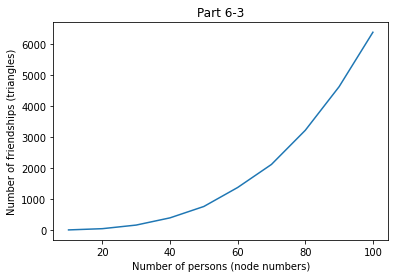

In [ ]:
# Question 11

import networkx as nx 
import matplotlib.pyplot as plt

n_s = 10
loop_n = 100
step = 10
n_cycle = 10
p = 0.34

x = []
y = []

for i in range (0,n_cycle):
  x.append(n_s)
  transitives = []
  for j in range (0,loop_n):
    random_graph = make_random_graph(n_s, p)
    transitive = nx.triangles(random_graph)
    transitives.append((sum(transitive.values())/3))
  n_s += step
  y.append(average(transitives))

plt.plot(x, y)
plt.xlabel('Number of persons (node numbers)')
plt.ylabel('Number of friendships (triangles)')
plt.title('Part 6-3')
plt.show()

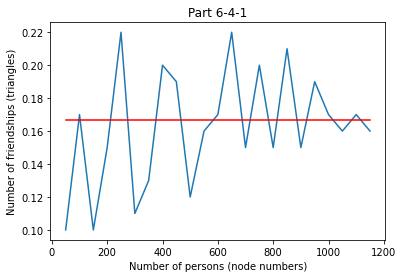

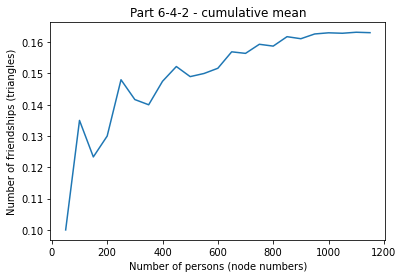

In [ ]:
# Question 12

import networkx as nx 
import matplotlib.pyplot as plt

n_s = 50
loop_n = 100
step = 50
n_cycle = 23

transitives = []

x = []
y = []
const = []
yy = []

for i in range (0,n_cycle):
  x.append(n_s)
  p = 1/n_s
  transitives.clear()
  for j in range (0,loop_n):
    random_graph = make_random_graph(n_s, p)
    transitive = nx.triangles(random_graph)
    transitives.append((sum(transitive.values())/3))
  n_s += step
  y.append(average(transitives))
  const.append(1/6)
  yy.append(average(y))

plt.plot(x, y)
plt.plot(x, const,'r-')
plt.xlabel('Number of persons (node numbers)')
plt.ylabel('Number of friendships (triangles)')
plt.title('Part 6-4-1')
plt.show()

plt.plot(x, yy)
plt.xlabel('Number of persons (node numbers)')
plt.ylabel('Number of friendships (triangles)')
plt.title('Part 6-4-2 - cumulative mean')
plt.show()

In [ ]:
# Question 13

import networkx as nx 

n = 150
p = 0.2
loop_n = 100
connected = 0
single_node = 0


for i in range (0,loop_n):
  G = make_random_graph(n, p)

  m = 0

  if(nx.is_connected(G) == True):
    connected += 1
  
  for j in range (0,n):
    if(G.degree(j)==0):
      m += 1
  
  if(m != 0):
    single_node += 1

print("Possibility of single node : "+str(single_node/loop_n))
print("Possibility of Connectivity : "+str(connected/loop_n))

Possibility of single node : 0.0
Possibility of Connectivity : 1.0


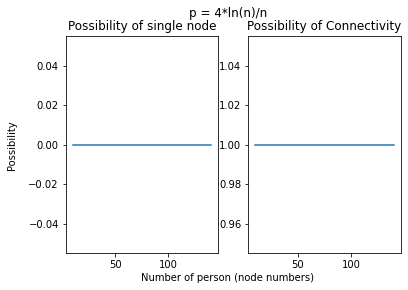

In [ ]:
# Question 14

import networkx as nx 
import numpy as np
import matplotlib.pyplot as plt

n_s = 10
loop_n = 100
n_cycle = 14

x = []
y = []
yy = []

for p in range (0,n_cycle):

  x.append(n_s)

  connected = 0
  single_node = 0

  p = 4*np.log(n_s)/n_s

  for i in range (0,loop_n):
    G = make_random_graph(n_s, p)

    m = 0

    if(nx.is_connected(G) == True):
      connected += 1
    
    for j in range (0,n_s):
      if(G.degree(j)==0):
        m += 1
    
    if(m != 0):
      single_node += 1

  y.append(single_node/loop_n)
  yy.append(connected/loop_n)
  n_s += 10

fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.plot(x, y)
ax2.plot(x, yy)

ax1.set_title('Possibility of single node')
ax2.set_title('Possibility of Connectivity')

fig.text(0.5, 0.04, 'Number of person (node numbers)', ha='center', va='center')
fig.text(0.001, 0.5, 'Possibility', ha='center', va='center', rotation='vertical')

fig.suptitle('p = 4*ln(n)/n')

plt.show()

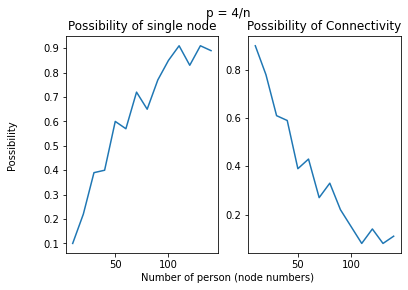

In [ ]:
# Question 15

import networkx as nx 
import numpy as np
import matplotlib.pyplot as plt

n_s = 10
loop_n = 100
n_cycle = 14

x = []
y = []
yy = []

for p in range (0,n_cycle):

  x.append(n_s)

  connected = 0
  single_node = 0

  p = 4/n_s

  for i in range (0,loop_n):
    G = make_random_graph(n_s, p)

    m = 0

    if(nx.is_connected(G) == True):
      connected += 1
    
    for j in range (0,n_s):
      if(G.degree(j)==0):
        m += 1
    
    if(m != 0):
      single_node += 1

  y.append(single_node/loop_n)
  yy.append(connected/loop_n)
  n_s += 10

fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.plot(x, y)
ax2.plot(x, yy)

ax1.set_title('Possibility of single node')
ax2.set_title('Possibility of Connectivity')

fig.text(0.5, 0.04, 'Number of person (node numbers)', ha='center', va='center')
fig.text(0.001, 0.5, 'Possibility', ha='center', va='center', rotation='vertical')

fig.suptitle('p = 4/n')

plt.show()